In [17]:
from CollectMaPSAs import *
import ROOT
import cPickle
import matplotlib
import matplotlib.pyplot as plt

from MakeModulePlots import *

In [18]:
plt.rc('font', size=18, weight='bold', family='sans-serif')
plt.rc('axes', titlesize=18)#, labelsize=18)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=22)
plt.rc('figure', titlesize=18)

In [19]:
name = "HPK"
vendor = "Vendor 1"

#name = "QPT"
#vendor = "Vendor 2"

outdir = name+"-plots"

In [20]:
# Pixel plots
allpix = pd.read_csv(name+"-plots/allpix.csv")
allpix_bad = pd.read_csv(name+"-plots/allpix_bad.csv")

npix = len(allpix["pa"])
print(npix)

logmax = npix*50

1289504


In [21]:
allpix.columns

Index([u'Unnamed: 0', u'pa', u'CAL_RMS', u'CAL_Mean', u'THR_RMS', u'THR_Mean',
       u'CAL_RMS_pretrim', u'CAL_Mean_pretrim', u'THR_RMS_pretrim',
       u'THR_Mean_pretrim', u'Bump_RMS', u'mask', u'trimbits',
       u'THR_Mean_pretrim_DER', u'THR_RMS_pretrim_DER', u'THR_Mean_DER',
       u'THR_RMS_DER', u'CAL_Mean_pretrim_DER', u'CAL_RMS_pretrim_DER',
       u'CAL_Mean_DER', u'CAL_RMS_DER', u'Bump_Mean_DER', u'Bump_RMS_DER',
       u'mapsa', u'mpa'],
      dtype='object')

In [22]:
def draw_plot(x,y,xbounds,ybounds,xtitle,ytitle,title):

    xarray = np.clip(allpix[x],xbounds[0],xbounds[1])
    yarray = np.clip(allpix[y],ybounds[0],ybounds[1])

    plt.hist2d(x=xarray,y=yarray,bins=[np.linspace(xbounds[0],xbounds[1],60),np.linspace(ybounds[0],ybounds[1],60)],norm=matplotlib.colors.LogNorm())
    plt.xlabel(xtitle,fontweight='bold')
    plt.ylabel(ytitle,fontweight='bold')
    plt.suptitle(title,fontweight='bold')

    plt.xlim(xbounds)
    plt.ylim(ybounds)
    cbar = plt.colorbar()
    cbar.set_label("Pixels ("+name+")",fontweight='bold')
    
    plt.tight_layout()
    
    plt.savefig(outdir+"/hist2d_"+x+"_"+y+".pdf")
    plt.savefig(outdir+"/hist2d_"+x+"_"+y+".png")

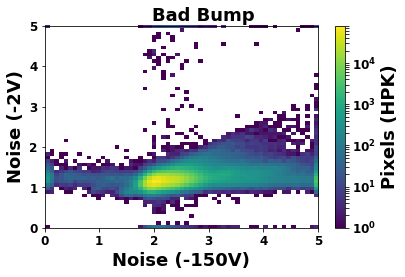

In [43]:
x="Bump_RMS"; y="CAL_RMS"

xbounds = [0,5]
ybounds = [0,5]

draw_plot(x,y,xbounds,ybounds,"Noise (-150V)","Noise (-2V)","Bad Bump")

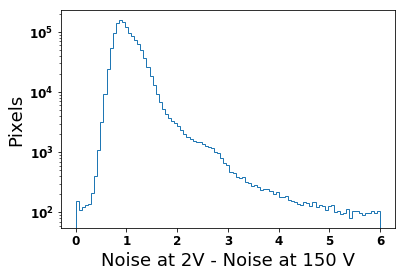

In [44]:
plt.hist(allpix['Bump_RMS']-allpix['CAL_RMS'],bins=np.linspace(0,6,100),histtype='step');
plt.yscale('log')
plt.xlabel('Noise at 2V - Noise at 150 V')
plt.ylabel('Pixels')
plt.savefig(outdir+"/BadBump.pdf",bbox_inches='tight')
plt.savefig(outdir+"/BadBump.png",bbox_inches='tight')

Loading MaPSA HPK32_2


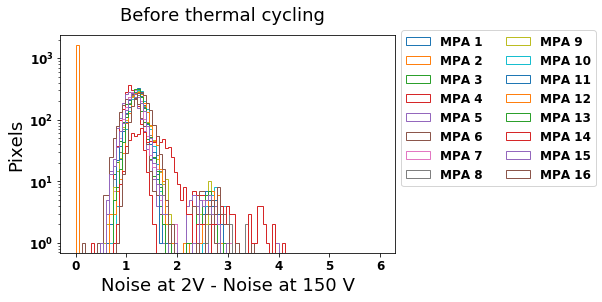

In [45]:
# Load MaPSAs
mapsa_names = ['HPK32_2']
mapsas = []

for m in mapsa_names:
    fname = 'pickles/'+m+'.pkl'
    if os.path.isfile(fname):
        print("Loading MaPSA " + m)
        mapsa = cPickle.load(open(fname,'rb'))
    else: 
        mapsa = MaPSA(m)
    mapsas += [mapsa]

    
for i,mpa in enumerate(mapsas[0].mpa_chips):
    plt.hist(mpa.pixels['Bump_RMS'] - mpa.pixels['CAL_RMS'],bins=np.linspace(0,6,100),histtype='step',label='MPA '+str(i+1))
    plt.suptitle('Before thermal cycling')
    plt.xlabel('Noise at 2V - Noise at 150 V')
    plt.ylabel('Pixels')
    plt.yscale('log')
    
plt.legend(bbox_to_anchor=(1,1.05),ncol=2,prop={"size":12})
plt.savefig(outdir+"/"+mapsa_names[0]+"_BadBump.pdf",bbox_inches='tight')
plt.savefig(outdir+"/"+mapsa_names[0]+"_BadBump.png",bbox_inches='tight')

Plotting Bad Bump Test for HPK32_2


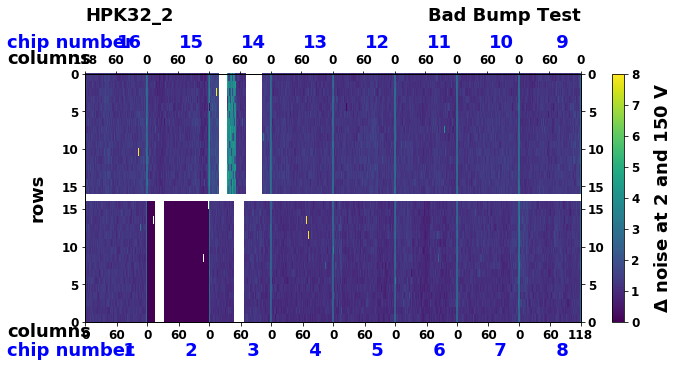

saving plot into HPK-plots/HPK32_2_BadBump_map.png/.pdf


True

In [46]:
array = []

for i,chip in enumerate(mapsas[0].mpa_chips):
    arr1 = abs(chip.pixels['Bump_RMS'] - chip.pixels['CAL_RMS'])
    array += [list(arr1)]
    
MakeModulePlot(arrays_of_data=array, row = [],col = [],nfig=17,hmin=0,hmax=8,plotAverage=False,
               identifier=mapsa_names[0],data_label="$\Delta$ noise at 2 and 150 V", test_label="Bad Bump Test",
               filename=outdir+"/"+mapsa_names[0]+"_BadBump_map")


Loading MaPSA HPK32_2_THCYC


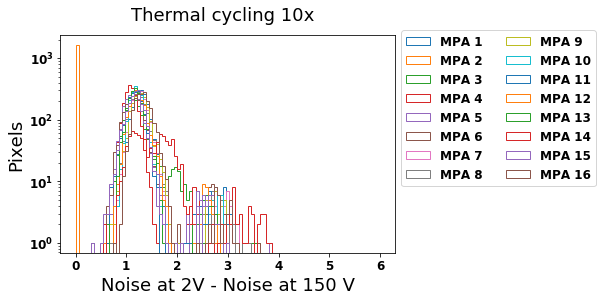

In [47]:
# Load MaPSAs
mapsa_names = ['HPK32_2_THCYC']
mapsas = []

for m in mapsa_names:
    fname = 'pickles/'+m+'.pkl'
    if os.path.isfile(fname):
        print("Loading MaPSA " + m)
        mapsa = cPickle.load(open(fname,'rb'))
    else: 
        mapsa = MaPSA(m)
    mapsas += [mapsa]

    
for i,mpa in enumerate(mapsas[0].mpa_chips):
    plt.hist(mpa.pixels['Bump_RMS'] - mpa.pixels['CAL_RMS'],bins=np.linspace(0,6,100),histtype='step',label='MPA '+str(i+1))
    plt.suptitle('Thermal cycling 10x')
    plt.xlabel('Noise at 2V - Noise at 150 V')
    plt.ylabel('Pixels')
    plt.yscale('log')
    
plt.legend(bbox_to_anchor=(1,1.05),ncol=2,prop={"size":12})
plt.savefig(outdir+"/"+mapsa_names[0]+"_BadBump.pdf",bbox_inches='tight')
plt.savefig(outdir+"/"+mapsa_names[0]+"_BadBump.png",bbox_inches='tight')

Plotting Bad Bump Test for HPK32_2_THCYC


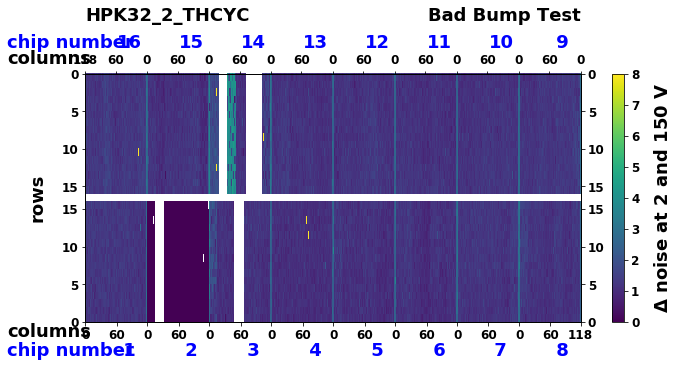

saving plot into HPK-plots/HPK32_2_THCYC_BadBump_map.png/.pdf


True

In [48]:
array = []

for i,chip in enumerate(mapsas[0].mpa_chips):
    arr1 = abs(chip.pixels['Bump_RMS'] - chip.pixels['CAL_RMS'])
    array += [list(arr1)]
    
MakeModulePlot(arrays_of_data=array, row = [],col = [],nfig=17,hmin=0,hmax=8,plotAverage=False,
               identifier=mapsa_names[0],data_label="$\Delta$ noise at 2 and 150 V", test_label="Bad Bump Test",
               filename=outdir+"/"+mapsa_names[0]+"_BadBump_map")


Loading MaPSA HPK32_2_THCYC2


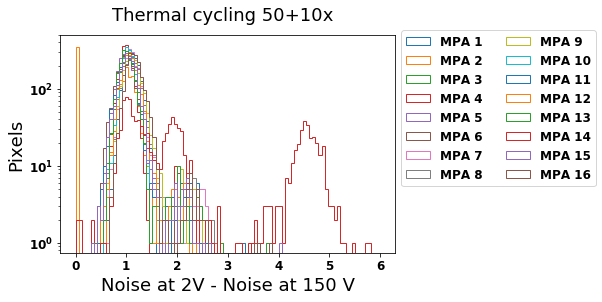

In [49]:
# Load MaPSAs
mapsa_names = ['HPK32_2_THCYC2']
mapsas = []

for m in mapsa_names:
    fname = 'pickles/'+m+'.pkl'
    if os.path.isfile(fname):
        print("Loading MaPSA " + m)
        mapsa = cPickle.load(open(fname,'rb'))
    else: 
        mapsa = MaPSA(m)
    mapsas += [mapsa]

    
for i,mpa in enumerate(mapsas[0].mpa_chips):
    plt.hist(mpa.pixels['Bump_RMS'] - mpa.pixels['CAL_RMS'],bins=np.linspace(0,6,100),histtype='step',label='MPA '+str(i+1))
    plt.suptitle('Thermal cycling 50+10x')
    plt.xlabel('Noise at 2V - Noise at 150 V')
    plt.ylabel('Pixels')
    plt.yscale('log')
    
plt.legend(bbox_to_anchor=(1,1.05),ncol=2,prop={"size":12})
plt.savefig(outdir+"/"+mapsa_names[0]+"_BadBump.pdf",bbox_inches='tight')
plt.savefig(outdir+"/"+mapsa_names[0]+"_BadBump.png",bbox_inches='tight')

Plotting Bad Bump Test for HPK32_2_THCYC2


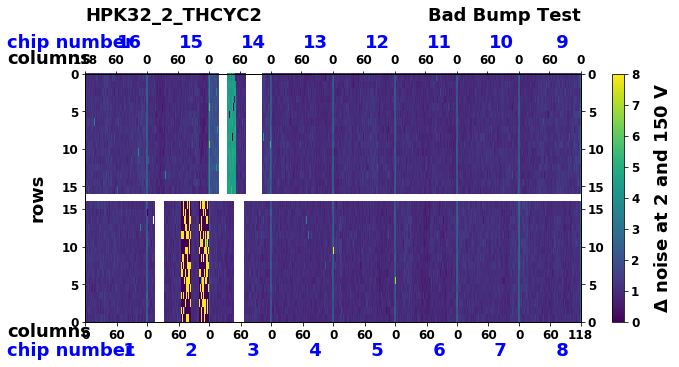

saving plot into HPK-plots/HPK32_2_THCYC2_BadBump_map.png/.pdf


True

In [50]:
array = []

for i,chip in enumerate(mapsas[0].mpa_chips):
    arr1 = abs(chip.pixels['Bump_RMS'] - chip.pixels['CAL_RMS'])
    array += [list(arr1)]
    
MakeModulePlot(arrays_of_data=array, row = [],col = [],nfig=17,hmin=0,hmax=8,plotAverage=False,
               identifier=mapsa_names[0],data_label="$\Delta$ noise at 2 and 150 V", test_label="Bad Bump Test",
               filename=outdir+"/"+mapsa_names[0]+"_BadBump_map")

Loading MaPSA HPK32_2_THCYC3_1


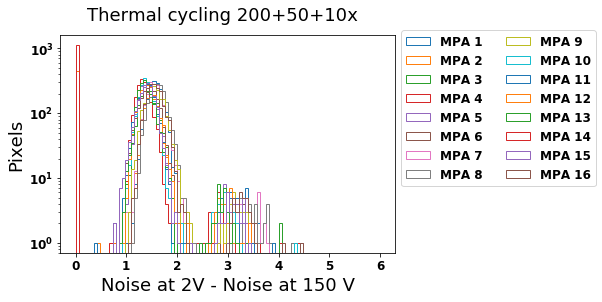

In [51]:
# Load MaPSAs
mapsa_names = ['HPK32_2_THCYC3_1']
mapsas = []

for m in mapsa_names:
    fname = 'pickles/'+m+'.pkl'
    if os.path.isfile(fname):
        print("Loading MaPSA " + m)
        mapsa = cPickle.load(open(fname,'rb'))
    else: 
        mapsa = MaPSA(m)
    mapsas += [mapsa]

    
for i,mpa in enumerate(mapsas[0].mpa_chips):
    plt.hist(mpa.pixels['Bump_RMS'] - mpa.pixels['CAL_RMS'],bins=np.linspace(0,6,100),histtype='step',label='MPA '+str(i+1))
    plt.suptitle('Thermal cycling 200+50+10x')
    plt.xlabel('Noise at 2V - Noise at 150 V')
    plt.ylabel('Pixels')
    plt.yscale('log')
    
plt.legend(bbox_to_anchor=(1,1.05),ncol=2,prop={"size":12})
plt.savefig(outdir+"/"+mapsa_names[0]+"_BadBump.pdf",bbox_inches='tight')
plt.savefig(outdir+"/"+mapsa_names[0]+"_BadBump.png",bbox_inches='tight')

Plotting Bad Bump Test for HPK32_2_THCYC3_1


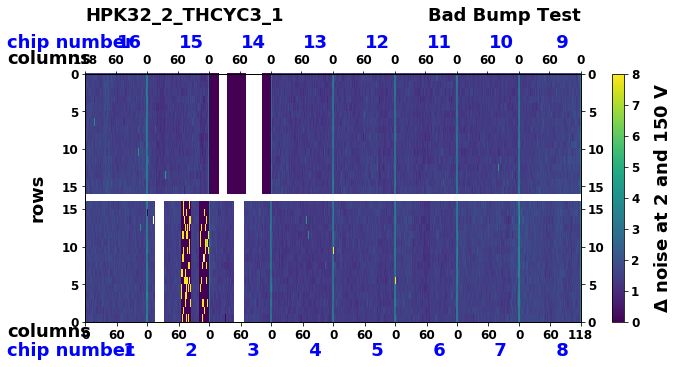

saving plot into HPK-plots/HPK32_2_THCYC3_1_BadBump_map.png/.pdf


True

In [52]:
array = []

for i,chip in enumerate(mapsas[0].mpa_chips):
    arr1 = abs(chip.pixels['Bump_RMS'] - chip.pixels['CAL_RMS'])
    array += [list(arr1)]
    
MakeModulePlot(arrays_of_data=array, row = [],col = [],nfig=17,hmin=0,hmax=8,plotAverage=False,
               identifier=mapsa_names[0],data_label="$\Delta$ noise at 2 and 150 V", test_label="Bad Bump Test",
               filename=outdir+"/"+mapsa_names[0]+"_BadBump_map")